# Probability intro

## Probability intro

Conditional probability
$$
p(x|y) = \frac{p(x, y)}{p(y)}
$$

Product rule
$$
p(x,y) = p(x|y)p(y)
$$

Sum rule
$$
p(x) = \int p(x|y) p(y) \rm{d} y = \int p(x, y) \rm{d} y
$$

Bayes theorem
$$
p(y|x) = \frac{p(x|y)p(y)}{\int p(x|y) p(y) \rm{d} y}
$$

# Bayesian vs Frequentist

## Bayesian vs Frequentist

$$
X = (X_1, \ldots, X_n) \sim p(x|\theta)
$$

### Frequentist

$$
\theta^{MLE} = \arg\max_{\theta} p(X|\theta)
$$

### Bayesian

Introduce $p(\theta)$ that encodes our beliefs about $\theta$, then
$$
p(\theta|X) = \frac{p(X|\theta) p(\theta)}{\int p(X|\theta) p(\theta) \rm{d} \theta}
$$

## Bayesian vs Frequentist

|  | Frequentist | Bayesian |
| --- | :-: | :-: |
| Randomness interpretation | Objective randomness | Subjective randomness |
| Variables | Random and deterministic | All random |
| Inference | Maximum likelihood | Bayes theorem |
| Estimate | Point estimate | Posterior distribution |
| Application | $n \gg d$ | $\forall n$ |

$$
\lim_{n \gg d} p(\theta | X) = \delta(\theta - \theta^{MLE})
$$

# Bayesian advantages

## Bayesian advantages

1. Regularization
$$
\log p(\theta|X) \propto \log p(X|\theta) + \log p(\theta)
$$
2. Compositioning (allows for chaining)
$$
p(y|z, x) = \frac{p(z|y) p(y|x)}{\int p(z|y) p(y|x) \rm{d} y}
$$
3. Streaming data: $p(\theta|X)$ encodes $X$
4. Latent variable models: $p(\theta|X)$ encodes MORE than $X$
5. Scalability

# Point estimates with posterior

## Point estimates with posterior

###  Posterior mean estimation
$$
\bar{\theta} = \int \theta p(\theta | X) \rm{d} \theta
$$

###  Maximum a posteriori estimation
$$
\theta^{MAP} = \arg\max_\theta p(\theta | X)
$$

$$
\theta^{MAP} = \arg\max_\theta p(\theta | X) = \arg\max_\theta \log p(\theta | X) = \arg\max_\theta \left( \log p(X|\theta) + \log p(\theta) \right)
$$

# Example

## Example

Suppose that you have a sample $X = (X_1, \ldots, X_n) \sim p(x|\theta)$, where
$$
\begin{aligned}
p(x|\theta) & = Be(\theta) \\
p(\theta) & = U[0, 1]
\end{aligned}
$$

Then,
$$
p(\theta|X) \propto p(x|\theta) p(\theta) = p^s (1-p)^{n-s}
$$

$$
p(x | \alpha, \beta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} x^{\alpha-1} (1-x)^{\beta-1}
$$

$$
p(\theta|X) = Beta(s+1, n-s+1)
$$

## Example

$$
\begin{aligned}
p(x|\theta) & = Be(\theta) \\
p(\theta) & = U[0, 1] \\
p(\theta|X) & = Beta(s+1, n-s+1)
\end{aligned}
$$

$$
\bar{\theta} = \mathbb{E} [Beta(s+1, n-s+1)]
$$

$$
\bar{\theta} = \mathbb{E} [Beta(s+1, n-s+1)] = \frac{\alpha}{\alpha+\beta} = \frac{s+1}{n-1}
$$

$$
\bar{\theta} = \lambda_n \theta^{MSE} + (1 - \lambda_n) \tilde{\theta}
$$
where $\tilde{\theta} = \frac12$ is prior mean and $\lambda_n = \frac{n}{n+2}$

## Example

Suppose that you have a sample $X = (X_1, \ldots, X_n) \sim p(x|\theta)$, where
$$
\begin{aligned}
p(x|\theta) & = Be(\theta) \\
p(\theta) & = Beta(\alpha, \beta)
\end{aligned}
$$

Then,
$$
p(\theta|X) = Beta(\alpha+s, \beta+n-s)
$$

And
$$
\bar{\theta} = \mathbb{E} [Beta(\alpha+s, \beta+n-s)] = \frac{\alpha}{\alpha+\beta} = \frac{\alpha+s}{\alpha+\beta+n} = \frac{n}{\alpha+\beta+n} \theta^{MLE} + \frac{\alpha+\beta}{\alpha+\beta+n} \tilde{\theta}
$$

# Code

In [1]:
import numpy as np
import scipy.stats as sts

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.5)
sns.despine()

%matplotlib inline

In [2]:
bernoulli = sts.bernoulli(1/3)

n = 20
X = bernoulli.rvs(n)
s = X.sum()

alpha = 0.5 # 2
beta = 0.5 # 5

# prior = sts.uniform()
prior = sts.beta(alpha, beta)

# true_posterior = sts.beta(s+1, n-s+1)
true_posterior = sts.beta(alpha+s, beta+n-s)

xx = np.linspace(0, 1, 100)

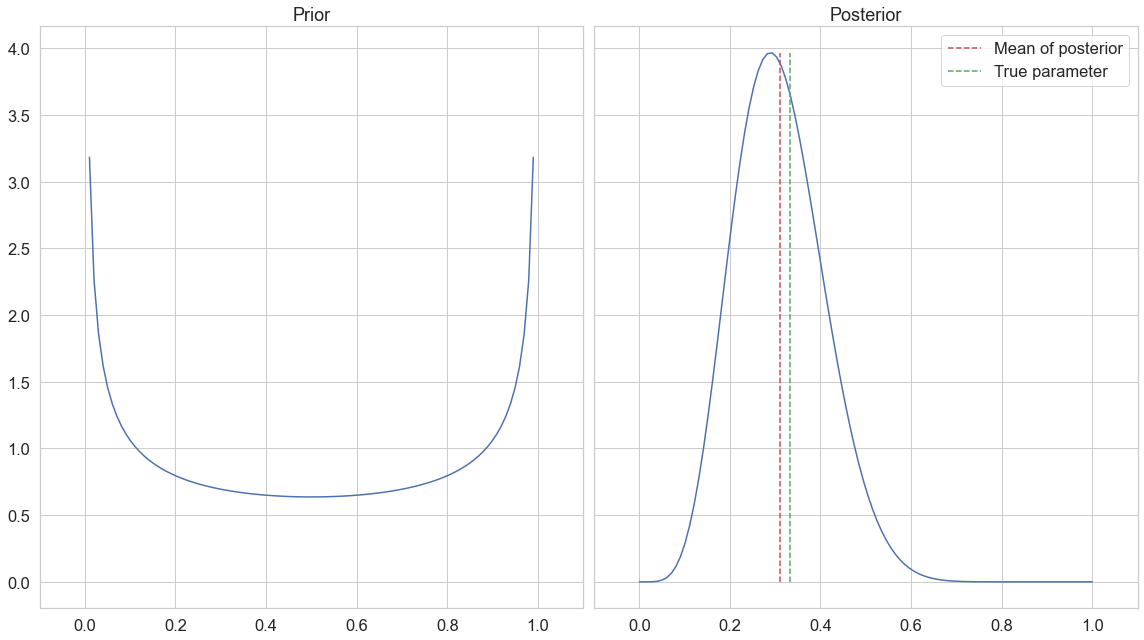

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(16,9), sharey=True)
ax[0].plot(xx, prior.pdf(xx))
ax[0].set_xlim((-0.1, 1.1))
ax[0].set_title("Prior")
ax[1].plot(xx, true_posterior.pdf(xx))
ax[1].set_xlim((-0.1, 1.1))
ax[1].set_title("Posterior")
ax[1].vlines((alpha + s) / (alpha + beta + n), 0, true_posterior.pdf(xx).max(), ls='--', color='r', label="Mean of posterior")
ax[1].vlines(1/3, 0, true_posterior.pdf(xx).max(), ls='--', color='g', label="True parameter")
ax[1].legend()
fig.tight_layout()

In [4]:
bernoulli = sts.bernoulli(1/3)

n = 10

alpha = 0.5 # 4.0
beta = 0.5 # 10.0

# prior = sts.uniform()
prior = sts.beta(alpha, beta)

# true_posterior = sts.beta(s+1, n-s+1)
true_posterior = sts.beta(alpha+s, beta+n-s)

xx = np.linspace(0, 1, 100)

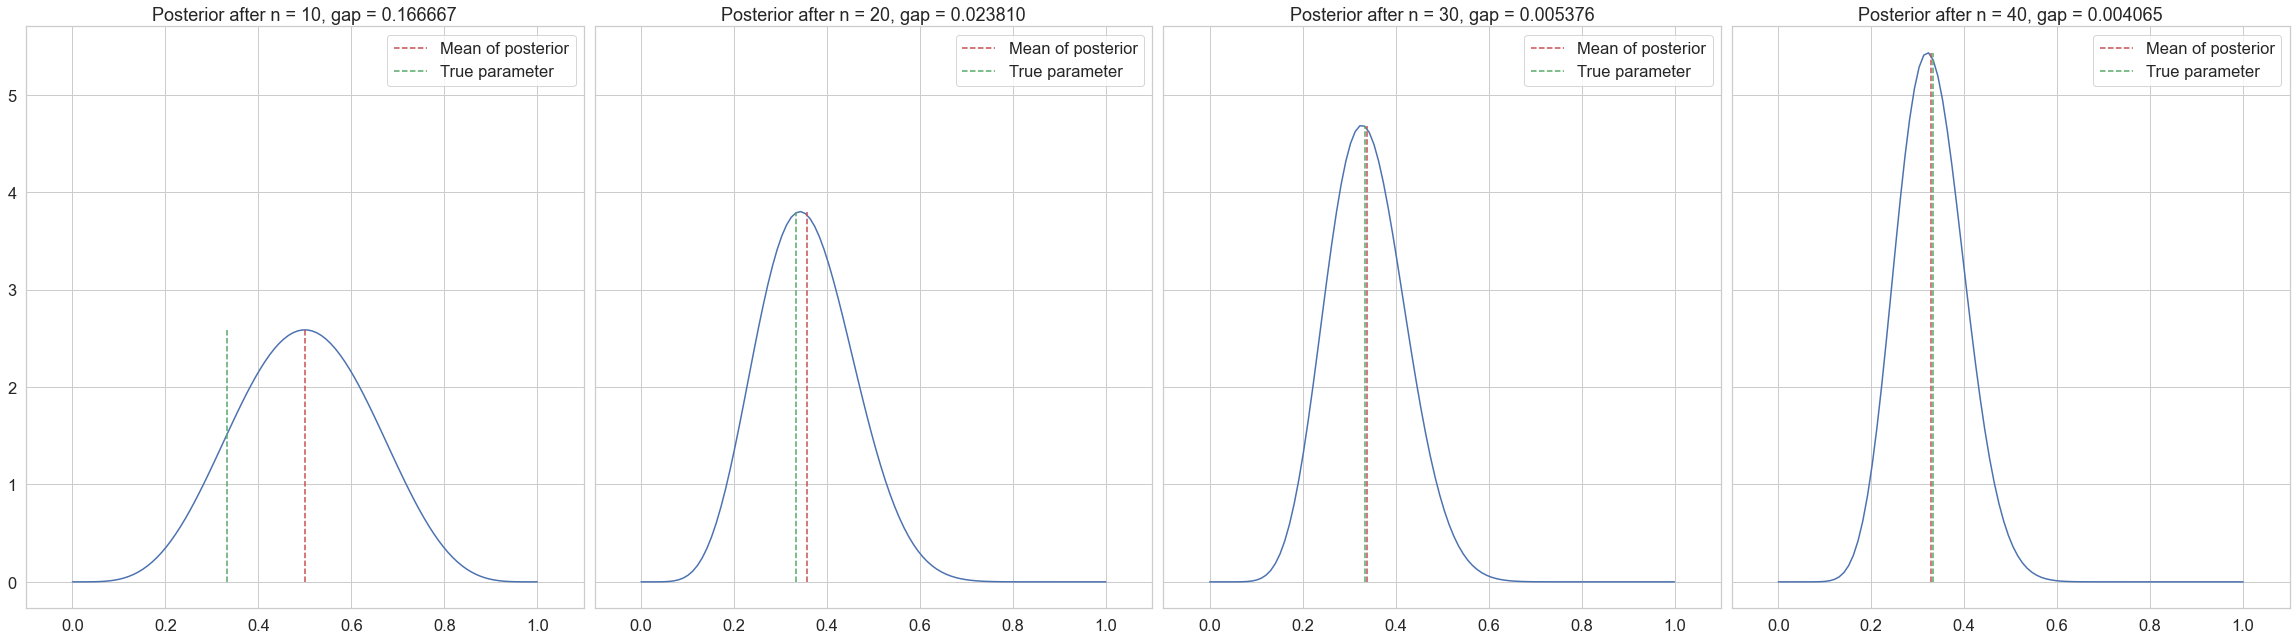

In [5]:
fig, ax = plt.subplots(1, 4, figsize=(32,9), sharey=True)
cur_alpha = alpha
cur_beta = beta
for i, ax in zip(range(1, 5), ax.flatten()):
    sample = bernoulli.rvs(n, random_state=1234+i)
    s = sample.sum()
    true_posterior = sts.beta(cur_alpha+s, cur_beta+n-s)
    ax.plot(xx, true_posterior.pdf(xx))
    ax.set_xlim((-0.1, 1.1))
    ax.set_title(
        f"Posterior after n = {n * i}, gap = {np.abs((cur_alpha + s) / (cur_alpha + cur_beta + n) - 1/3):3f}"
    )
    ax.vlines(
        (cur_alpha + s) / (cur_alpha + cur_beta + n),
        0, true_posterior.pdf(xx).max(),
        ls='--', color='r', label="Mean of posterior"
    )
    ax.vlines(1/3, 0, true_posterior.pdf(xx).max(), ls='--', color='g', label="True parameter")
    ax.legend()
    cur_alpha = cur_alpha + s
    cur_beta = cur_beta + n - s
fig.tight_layout()

# Priors

1. Improper (not a distribution)
2. Flat (like in the example)
3. Jeffreys (transformation invariant)
$$
    p(\theta) = \sqrt{|I(\theta)|}
$$

For Bernoulli:
$$
    p(\theta) = Beta\left(\frac12, \frac12\right)
$$

# Bayesian testing: MAP test

Suppose that we have sample $X = (X_1, \ldots, X_n) \sim p(x|\theta)$ and we have prior $p(\theta)$. We'd like to test:
$$
\begin{aligned}
H_0 & : \theta = \theta_0 \\
H_1 & : \theta = \theta_1
\end{aligned}
$$

The test statistic is given as follows:
$$
\Lambda(X) = \frac{L(X, \theta_1)}{L(X, \theta_0)}
$$

We reject the null hypothesis, if
$$
\Lambda(X) \geqslant \frac{\mathbb{P}(H_0)}{\mathbb{P}(H_1)}
$$

# Statistical Decision Theory

How to compare different decision rules?

Denote:
- decision rule $\delta(X)$
- loss function $\ell(\theta, \delta)$
- risk function $R(\theta, \delta) = \mathbb{E}_X \ell(\theta, \delta(X))$

The estimate is given by
$$
\hat{\theta} = \arg\min_\delta R(\theta, \delta)
$$

With prior $p(\theta)$ and posterior $p(\theta|X)$, we have Bayesian rule for a given loss function:
$$
\delta^B = \arg\min_\delta \int \ell(\theta, \delta(X)) p(\theta|X) \rm{d} \theta
$$